# Setup

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars_raw.csv to cars_raw (1).csv


In [ ]:
import io
myDF = pd.read_csv(io.BytesIO(uploaded['cars_raw.csv']))
# Dataset is now stored in a Pandas Dataframe
myDF

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [ ]:
# drop null values and reset the index
print(myDF.isnull().sum())
myDF = myDF.dropna()
myDF = myDF.reset_index()
myDF.head()

Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64


,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
4,5,2012,Toyota,4Runner SR5,Used,"$23,541",4.7,34,Dealer,AutoNation Toyota Hayward,...,–,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469


In [ ]:
# remove rows that do not have a price
myDF = myDF[myDF["Price"] != "Not Priced"]

# convert the price from strings to ints
myDF["Price"] = myDF["Price"].str.replace(',', '')
myDF["Price"] = myDF["Price"].str.replace('$', '')
pd.to_numeric(myDF["Price"])

# create AvgMPG variable
myDF["AvgMPG"] = (myDF["MinMPG"] + myDF["MaxMPG"]) / 2

myDF.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG
0,0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,...,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,23.0
1,1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,...,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,21.5
2,2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,...,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,18.0
3,4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,...,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,23.5
4,5,2012,Toyota,4Runner SR5,Used,23541,4.7,34,Dealer,AutoNation Toyota Hayward,...,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,20.0


# Question 5: Clustering

Question: Dividing the data into new and old cars, and clustering with the variables below, what can be said about the type of cars within the clusters? What are the average characteristics of the car (within clusters) a buyer should expect?

Variables Involved: price, min mpg, max mpg, comfort rating, performance rating, reliability rating, consumer rating

Cleaning: Missing values dropped, data split into new and used cars, converting categorical vars into dummy vars, creating new variable (avg mpg – taking the avg of the min and max mpg per car)

Modeling/Computation: We will use dbscan to group the different cars into clusters. We will then look at the different clusters and isolate them into their own dataframes to see the average characteristics of the cars within them

Graphs: scatterplots looking at price and the predictor vars, as well as returning the summary statistics of the data within the clusters

Brief Discussion of why analysis is effective at answering questions: By using dbscan we can group the cars by how similar their attributes are. In doing this we can isolate clusters into their characteristics of avg mpg and their ratings, and see what customers should expect in regards to those characteristics.

The main utility of this model will allow individuals who have an idea of the specs of the car or type of car they want, to see the type of car that best fits their specified wants (luxury car, pure reliability, efficiency, etc.), as well as some cars to use as a benchmark of what to expect.


In [ ]:
# Dataset only contains used cars

# used_cars = myDF["Used/New"] == "Used"
# myDF.loc[used_cars].head()

# new_cars = myDF["Used/New"] == "New"
# myDF.loc[new_cars].head()

In [ ]:
# zscoring continuous and interval predictor vars
X = ["Price", "AvgMPG", "ComfortRating", "PerformanceRating", "ReliabilityRating", "ConsumerRating"]

z = StandardScaler()
myDF[X] = z.fit_transform(myDF[X])


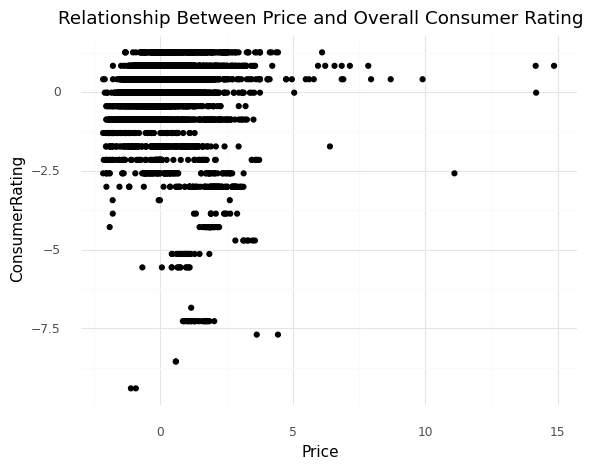

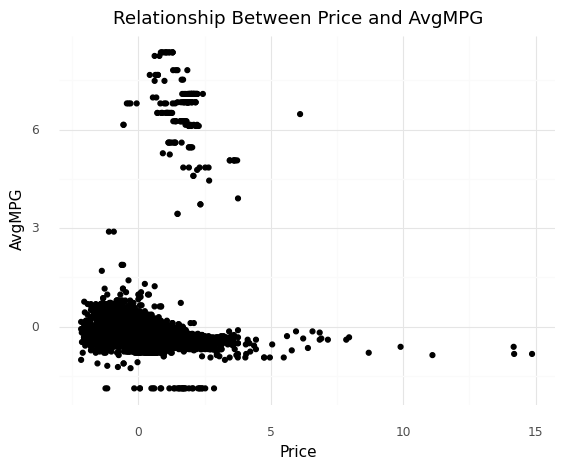

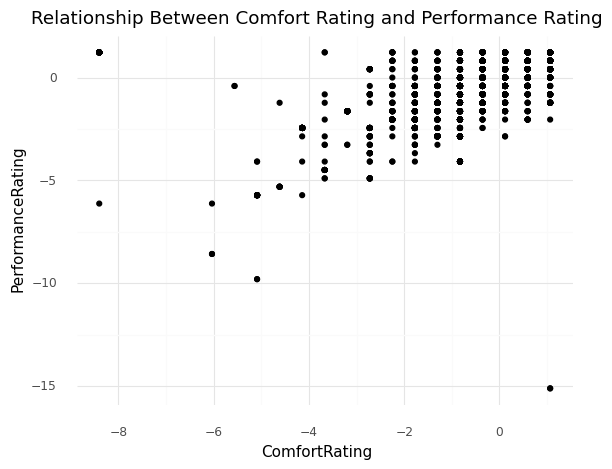

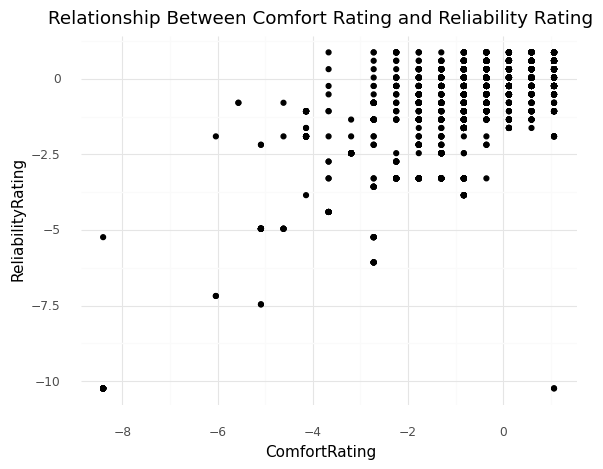

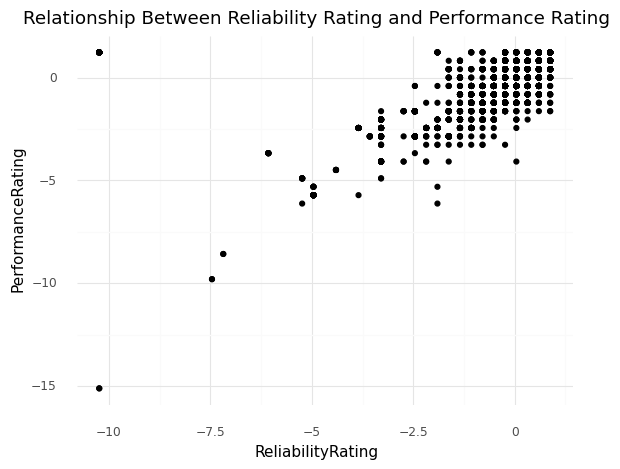

In [ ]:
# create a scatterplot of the data
print(ggplot(myDF, aes(x = "Price", y = "ConsumerRating")) +
      geom_point() +
      theme_minimal() +
      labs(title = "Relationship Between Price and Overall Consumer Rating"))

print(ggplot(myDF, aes(x = "Price", y = "AvgMPG")) +
      geom_point() +
      theme_minimal() +
      labs(title = "Relationship Between Price and AvgMPG"))

print(ggplot(myDF, aes(x = "ComfortRating", y = "PerformanceRating")) +
      geom_point() +
      theme_minimal() +
      labs(title = "Relationship Between Comfort Rating and Performance Rating"))

print(ggplot(myDF, aes(x = "ComfortRating", y = "ReliabilityRating")) +
      geom_point() +
      theme_minimal() +
      labs(title = "Relationship Between Comfort Rating and Reliability Rating"))

print(ggplot(myDF, aes(x = "ReliabilityRating", y = "PerformanceRating")) +
      geom_point() +
      theme_minimal() +
      labs(title = "Relationship Between Reliability Rating and Performance Rating"))

The scatterplots above show the relationships between some of the key variables used in our model, with all the variables z scored.

The first two graphs show the relationship between the the price and some of the most important variables to look at when buying a used car: the average miles per gallon and the overall consumer rating. In regards to the AvgMPG, we can see that it does not vary too much across different prices, however, on the lower end of prices we can see that there are some observations where the cars have a higher AvgMPG.

The following three graphs show the relationship between the other consumer ratings that I considered to be very important: the comfort rating, the performance rating, and the reliability rating. Initially I believed that there would be tradeoffs that the consumer would have to expect when buying a car, but looking at the scatter plots, we can see that they tend to be positively correlated with eachother

## DBSCAN

In [ ]:
# creating and fitting dbscan model
cars_dbscan = DBSCAN(eps = 1, min_samples = 35).fit(myDF[X])

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(cars_dbscan.labels_)))]

myDF["assignments"] = cars_dbscan.labels_

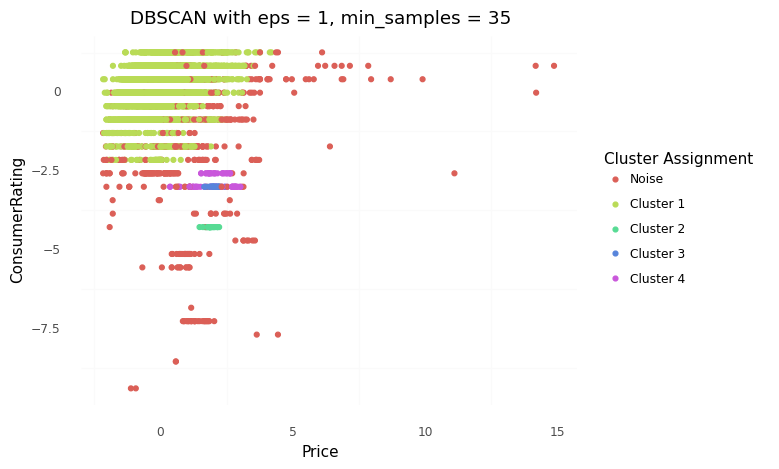

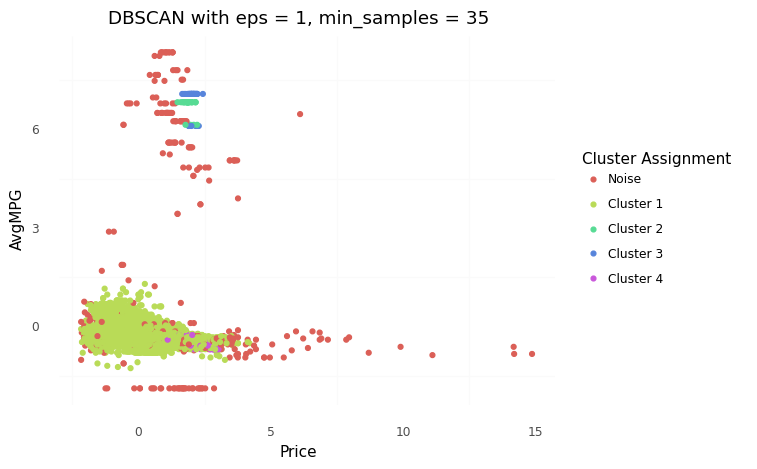

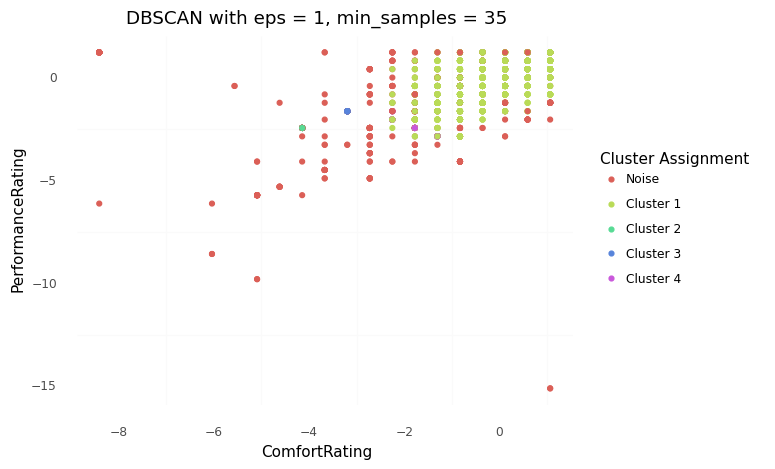

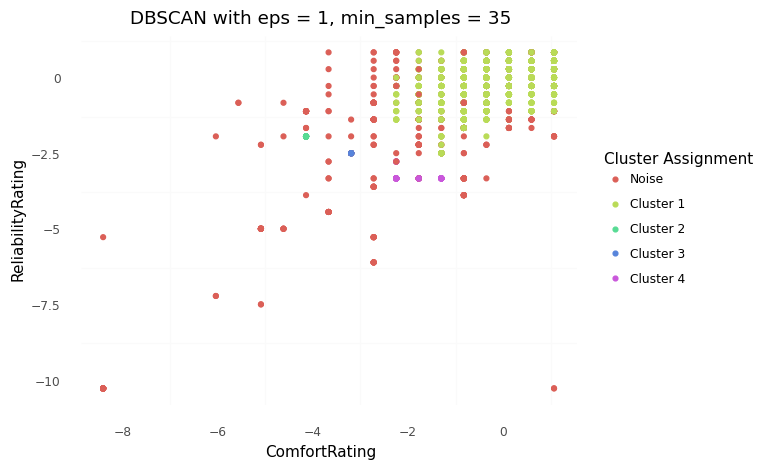

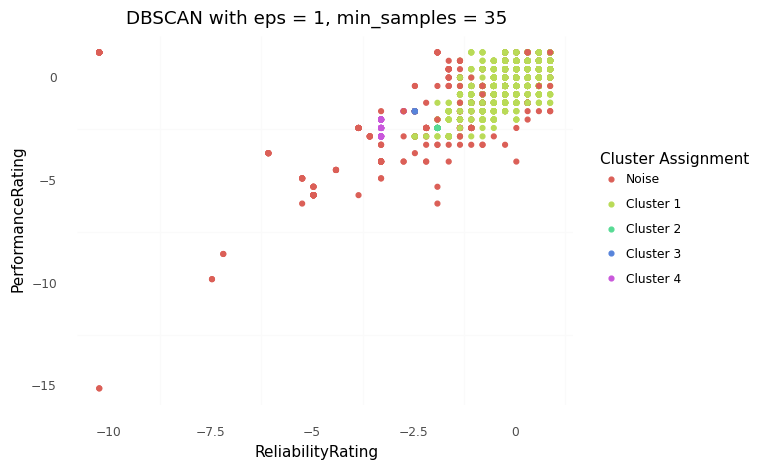

In [ ]:
print(ggplot(myDF, aes(x = "Price", y = "ConsumerRating", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    theme(panel_grid_major = element_blank()) +
    labs(title = "DBSCAN with eps = 1, min_samples = 35"))

print(ggplot(myDF, aes(x = "Price", y = "AvgMPG", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    theme(panel_grid_major = element_blank()) +
    labs(title = "DBSCAN with eps = 1, min_samples = 35"))

print(ggplot(myDF, aes(x = "ComfortRating", y = "PerformanceRating", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    theme(panel_grid_major = element_blank()) +
    labs(title = "DBSCAN with eps = 1, min_samples = 35"))

print(ggplot(myDF, aes(x = "ComfortRating", y = "ReliabilityRating", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    theme(panel_grid_major = element_blank()) +
    labs(title = "DBSCAN with eps = 1, min_samples = 35"))

print(ggplot(myDF, aes(x = "ReliabilityRating", y = "PerformanceRating", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    theme(panel_grid_major = element_blank()) +
    labs(title = "DBSCAN with eps = 1, min_samples = 35"))

The scatterplots above are the same as those created before, but are colored by the clustering assignments. From the scatterplots we can see that a majority of the cars fall into our first cluster. These cars have similar characteristics in regards to the variables clustered by, and tend to have higher ratings, lower prices, and lower AvgMPG. The other clusters are considerably smaller that cluster one, and in regards to the characteristics of the other clusters, are the middle of the road.

In [ ]:
# grab only clustered data points
myDF_clustered = myDF.loc[(myDF.assignments >= 0)]

# calulate silhouete score for the clusters (excluding noise)
print(silhouette_score(myDF_clustered[X], myDF_clustered["assignments"]))

# compare clusters silhouette score to the overall silhouette score (includes noise)
print(silhouette_score(myDF[X], myDF["assignments"]))


0.6899426291371167
0.6244540179409475


With a silhouette score of ~0.69 for the clusters (excluding noise), and a silhouette score of ~0.62 for the clusters (including noise), we can say that the clusters made have good separation and cohesion, but nothing exceptional.

In [ ]:
# creating a copy of the DF and typecasting the price to a float
carsDF = pd.read_csv(io.BytesIO(uploaded['cars_raw.csv']))

carsDF = carsDF.dropna()
carsDF = carsDF.reset_index()

carsDF = carsDF[carsDF["Price"] != "Not Priced"]
carsDF["Price"] = carsDF["Price"].str.replace(',', '')
carsDF["Price"] = carsDF["Price"].str.replace('$', '')
pd.to_numeric(carsDF["Price"], downcast = "float")


carsDF["Price"] = carsDF["Price"].astype(float)
carsDF.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
4,5,2012,Toyota,4Runner SR5,Used,23541.0,4.7,34,Dealer,AutoNation Toyota Hayward,...,–,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469


In [ ]:
carsDF["AvgMPG"] = (carsDF["MinMPG"] + carsDF["MaxMPG"]) / 2

carsDF["assignments"] = myDF["assignments"]

carsDF.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG,assignments
0,0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,...,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,23.0,0
1,1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,...,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,21.5,0
2,2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,...,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,18.0,0
3,4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,...,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,23.5,0
4,5,2012,Toyota,4Runner SR5,Used,23541.0,4.7,34,Dealer,AutoNation Toyota Hayward,...,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,20.0,0


In [ ]:
# return a DF with the mean stats for the predictor vars for each cluster
clustered_DF = carsDF.groupby(["assignments"])[["AvgMPG", "ComfortRating",
                                              "PerformanceRating", "ReliabilityRating", "ConsumerRating", "Price"]].mean()

clustered_DF

,AvgMPG,ComfortRating,PerformanceRating,ReliabilityRating,ConsumerRating,Price
assignments,,,,,,
-1,40.088561,4.380812,4.359410,3.996863,4.256642,58829.939114
0,24.400909,4.810287,4.728924,4.745730,4.746652,37264.810795
1,118.871429,3.900000,4.100000,4.000000,3.700000,69597.028571
2,121.810811,4.100000,4.300000,3.800000,4.000000,72107.648649
3,19.225352,4.391549,4.114085,3.511268,4.036620,71891.197183


In [ ]:
clustered_DF["Assignments"] = [0, 1, 2, 3, 4]
clustered_DF["Price"] = clustered_DF["Price"] / 1000

clustered_DF

,AvgMPG,ComfortRating,PerformanceRating,ReliabilityRating,ConsumerRating,Price,Assignments
assignments,,,,,,,
-1,40.088561,4.380812,4.359410,3.996863,4.256642,58.829939,0
0,24.400909,4.810287,4.728924,4.745730,4.746652,37.264811,1
1,118.871429,3.900000,4.100000,4.000000,3.700000,69.597029,2
2,121.810811,4.100000,4.300000,3.800000,4.000000,72.107649,3
3,19.225352,4.391549,4.114085,3.511268,4.036620,71.891197,4


In [ ]:
cluster_1_cars = carsDF[carsDF["assignments"] == 0]
cluster_1_cars.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG,assignments
0,0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,...,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,23.0,0
1,1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,...,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,21.5,0
2,2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,...,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,18.0,0
3,4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,...,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,23.5,0
4,5,2012,Toyota,4Runner SR5,Used,23541.0,4.7,34,Dealer,AutoNation Toyota Hayward,...,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,20.0,0


In [ ]:
cluster_2_cars = carsDF[carsDF["assignments"] == 1]
cluster_2_cars.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG,assignments
143,163,2020,Tesla,Model Y Long Range,Used,65995.0,3.7,10,Dealer,Victory Mitsubishi,...,127,114,Electric,1-Speed Automatic,Electric,5YJYGDEE8LF049382,17666,9561,120.5,1
156,177,2020,Tesla,Model Y Long Range,Used,73992.0,3.7,10,Dealer,Gilroy Chevrolet,...,127,114,Electric,1-Speed Automatic,Electric,5YJYGDEEXLF020479,LF020479T,12332,120.5,1
335,364,2020,Tesla,Model Y Long Range,Used,73990.0,3.7,10,Dealer,Hyundai of Vacaville,...,127,114,Electric,1-Speed Automatic,Electric,5YJYGDEE8LF036129,H7544,10729,120.5,1
473,507,2020,Tesla,Model Y Long Range,Used,69000.0,3.7,10,Dealer,Napleton Italian Imports,...,127,114,Electric,1-Speed Automatic,Electric,5YJYGDEE1LF035940,TAM1868,11382,120.5,1
790,834,2020,Tesla,Model Y Long Range,Used,69898.0,3.7,10,Dealer,Tracy Volkswagen,...,127,114,Electric,1-Speed Automatic,Electric,5YJYGDEE3LF023658,P16991,17338,120.5,1


In [ ]:
cluster_3_cars = carsDF[carsDF["assignments"] == 2]
cluster_3_cars.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG,assignments
151,171,2021,Tesla,Model Y Long Range,Used,71277.0,4.0,15,Dealer,AutoFair Honda,...,131,117,Electric,1-Speed Automatic,Electric,5YJYGDEE4MF086057,HM11774C,15002,124.0,2
258,285,2021,Tesla,Model Y Performance,Used,74799.0,4.0,15,Dealer,INFINITI of San Antonio,...,115,106,Electric,1-Speed Automatic,Electric,5YJYGDEFXMF076271,MF076271,12708,110.5,2
272,299,2021,Tesla,Model Y Long Range,Used,74900.0,4.0,15,Dealer,Heartland Chrysler Dodge Jeep Ram,...,131,117,Electric,1-Speed Automatic,Electric,5YJYGDEE7MF248005,KP2827,10926,124.0,2
338,367,2021,Tesla,Model Y Long Range,Used,72650.0,4.0,15,Dealer,Camelback Toyota,...,131,117,Electric,1-Speed Automatic,Electric,5YJYGDEE6MF124842,C1237,13919,124.0,2
350,379,2021,Tesla,Model Y Long Range,Used,75209.0,4.0,15,Dealer,INFINITI of San Antonio,...,131,117,Electric,1-Speed Automatic,Electric,5YJYGDEE3MF299940,MF299940,14347,124.0,2


In [ ]:
cluster_4_cars = carsDF[carsDF["assignments"] == 3]
cluster_4_cars.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG,assignments
191,217,2019,BMW,X7 xDrive50i,Used,81749.0,4.1,22,Dealer,Perillo Downers Grove,...,15,21,Gasoline,8-Speed Automatic,4.4L V8 32V GDI DOHC Twin Turbo,5UXCX4C53KLS35838,DG3705A,27289,18.0,3
320,349,2019,BMW,X7 xDrive50i,Used,69888.0,4.1,22,Dealer,"Bentley Parsippany and Paul Miller, An Authori...",...,15,21,Gasoline,8-Speed Automatic,4.4L V8 32V GDI DOHC Twin Turbo,5UXCX4C59KLS38811,ZX6422,46661,18.0,3
333,362,2021,GMC,Yukon Denali,Used,82995.0,4.0,24,Dealer,AutoNation Buick GMC Henderson,...,14,19,Gasoline,10-Speed Automatic,6.2L V8 16V GDI OHV,1GKS2DKL0MR128164,MR128164,33316,16.5,3
345,374,2020,Lincoln,Aviator Reserve AWD,Used,58998.0,4.0,88,Dealer,AutoNation Chrysler Dodge Jeep Ram Southwest,...,17,24,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,5LM5J7XC6LGL12842,LGL12842,37414,20.5,3
399,428,2020,Lincoln,Aviator Black Label AWD,Used,70988.0,4.0,88,Dealer,Central Florida Lincoln,...,17,24,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,5LM5J9XC5LGL31894,PL31894,14751,20.5,3


Cluster 1: 8467 Observations --> Cars: 2019 Toyoto Sienna SE, 2020 Lexus RX 350, Ford F-150 Lariat, etc.

Cluster 2: 35 Observations --> Cars: 2020 Tesla Model Y Long Range, 2020 Tesla Model Y Performance

Cluster 3: 37 Observations --> Cars: 2021 Tesla Model Y Long Range, 2021 Tesla Model Y Performance

Cluster 4: 71 Observations --> Cars: 2019 BMW X7, 2020 Lincoln Aviator Reserve, 2021 GMC Yukon Denali


In [ ]:
clustered_DF.drop(["Assignments"], axis = 1)


,AvgMPG,ComfortRating,PerformanceRating,ReliabilityRating,ConsumerRating,Price
assignments,,,,,,
-1,40.088561,4.380812,4.359410,3.996863,4.256642,58.829939
0,24.400909,4.810287,4.728924,4.745730,4.746652,37.264811
1,118.871429,3.900000,4.100000,4.000000,3.700000,69.597029
2,121.810811,4.100000,4.300000,3.800000,4.000000,72.107649
3,19.225352,4.391549,4.114085,3.511268,4.036620,71.891197


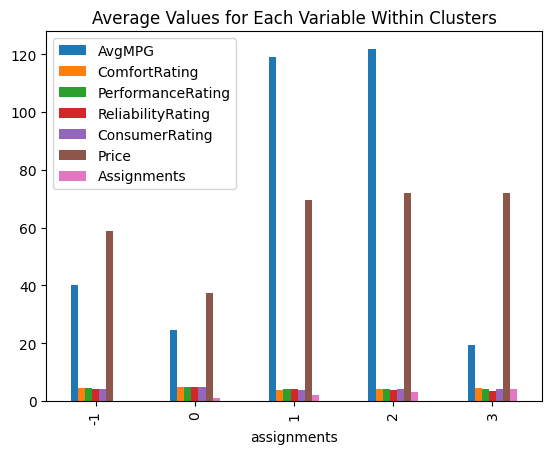

In [ ]:
clustered_DF.plot.bar(title = "Average Values for Each Variable Within Clusters")
plt.show()

This grouped bar chart shows the average characteristics for each of the assignments. In this, the numbers -1, 0, 1, 2, 3 are noise and clusters 1, 2, 3, 4 respectively. From the chart we can see that all the assignments have similar consumer rating characteristics. The main differences are found in the avg price and AvgMPG of the clusters.

## Findings

Going back to the initial question, our clustering model returns some interesting groupings of cars from the dataset. Based on the results of the scatterplots, and grouped bar plot above, we can see that the clusters have similar ratings given by the consumer in overall, comfort, performance, and reliability, with the main differences coming from the average miles per gallon and the price. Furthermore, looking by taking a random sample of the cars in each cluster, we can notice not only the average characteristics, but get an understanding of the type of cars there are.

Cluster 1 contains the majority of of the observations, containing the second lowest AvgMPG at ~24, and the lowest price at ~37k. Looking at the types of cars we can attribute these cars to being the most typical cars, neither fuel efficent nor pricey. These cars make up the majority of the cars in the dataset and are a rough average of the general trends of the cars.

Clusters 2 and 3 are very similar with an AvgMPG at ~120 and price at ~70k. These clusters contain the 2020 and 2021 Tesla model Y respectivly, and as such are incredibly "fuel efficient" with their high AvgMPG, as they are electric. As such cars that would fall into these clusters are electric and pregressively newer.

The final cluster, like the previous 2 has a price at ~70k, but a considerably lower AvgMPG (the lowest among clusters) at ~20. These cars can be attributed to luxury cars that are nto electric. From this we can see that these cars are "gas guzzler" luxury cars, and as such, is why it was defined as its own cluster as it is similar to the electric cars but since it is gas powered, doesnt have a high average miles per gallon.

# Question 6: Computation + Supervised Analysis

Question: Dividing the data into new and old cars, what are the average characteristics a buyer should expect from cars at different price levels
Variables Involved: price, mileage,  min mpg, max mpg, comfort rating, performance rating, reliability rating, consumer rating

Cleaning: Missing values dropped, data split into new and used cars, converting categorical vars into dummy vars, creating new variable (avg mpg – taking the avg of the min and max mpg per car)

Modeling/Computation: We will first split the data in used and new cars. We will then subset the data into different intervals of price, and within those subsets look to see the average characteristics. Finally we can make a correlation matrix of the variables involved to see which are related with each other.

Graphs: correlation matrix of vars involved, scatterplot of price and some of the vars, histograms for each price interval with the x-axis having the different variables and y-axis with their avg values

Brief Discussion of why analysis is effective at answering questions: By subsetting the data into different price intervals, we can see the average characteristics of cars at different price ranges. This can help us understand the relationship between price and the variables involved, as well as if they differ when comparing new/ used cars. The correlation matrix can also tell us which vars we expect to increase/ decrease together, and understand how they are related with price.

The main utility of this model will allow individuals who have a budget to see what specs they should expect, as well as understand the tradeoffs to be made when price is the primary factor in buying a car


In [ ]:
# returning the summary stats for price
carsDF["Price"] = carsDF["Price"].astype(float)
carsDF["Price"].describe()

count      9152.000000
mean      39075.080201
std       16208.529047
min        3995.000000
25%       28998.000000
50%       35999.000000
75%       45988.000000
max      279950.000000
Name: Price, dtype: float64

Interval 1: 0 - 28998 ==> Price < 28998

Interval 2: 28998 - 35999 ==> 28998 <= Price < 35999

Interval 3: 35999 - 45988 ==> 35999 <= Price < 45988

Interval 4: 45988 - 279950 ==> Price >= 45988

In [ ]:
carsDF["Mileage"] = carsDF["Mileage"].astype(float)
carsDF["Mileage"] = carsDF["Mileage"] / 1000
carsDF["ConsumerRating"] = carsDF["ConsumerRating"].astype(float)
carsDF["ReliabilityRating"] = carsDF["ReliabilityRating"].astype(float)
carsDF["PerformanceRating"] = carsDF["PerformanceRating"].astype(float)

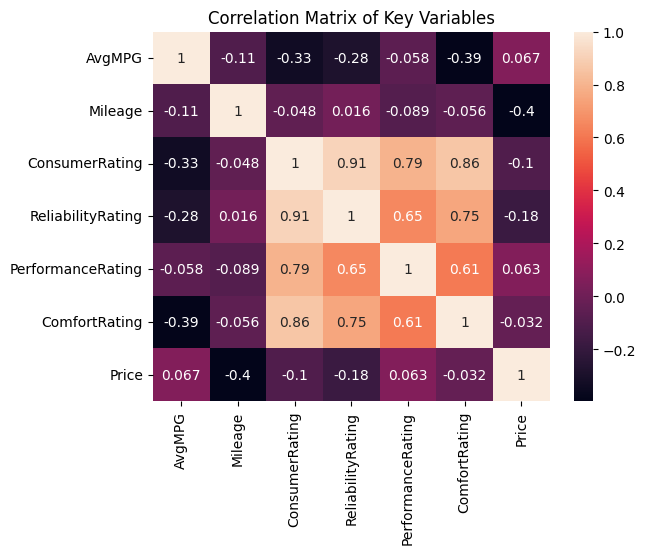

In [ ]:
correlation_matrix = carsDF[["AvgMPG", "Mileage", "ConsumerRating", "ReliabilityRating", "PerformanceRating", "ComfortRating", "Price"]].corr()
sn.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix of Key Variables")
plt.show()


From the correlation plot above we can see what variables are most closely related with eachother. The plot confirms the idea that the ratings are all very strongly positively correlated with eachother. The variables that are negatively correlated with eachother are the average miles per hour and the the different ratings, as well as the mileage. Finally, the strongest negatively correlated variables are the price of the car and the mileage on the car.

In [ ]:
interval_1 = carsDF[carsDF["Price"] < 28998]
interval_2 = carsDF[(carsDF["Price"] >= 28998) & (carsDF["Price"] < 35999)]
interval_3 = carsDF[(carsDF["Price"] >= 35999) & (carsDF["Price"] < 45988)]
interval_4 = carsDF[(carsDF["Price"] >= 45988)]

In [ ]:
interval_1.head()
interval_2.head()
interval_3.head()
interval_4.head()

,index,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,...,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AvgMPG,assignments
1,1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,...,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32.929,21.5,0
3,4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,...,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28.137,23.5,0
8,9,2020,Dodge,Charger Scat Pack,Dodge Certified,46773.0,4.8,56,Dealer,Bill Luke Chrysler Jeep Dodge RAM,...,15,24,Gasoline,8-Speed Automatic,6.4L V8 16V MPFI OHV,2C3CDXGJ8LH157532,CBY705,25.642,19.5,0
12,13,2020,Dodge,Charger Scat Pack,Dodge Certified,47500.0,4.8,56,Dealer,Tempe Dodge Chrysler Jeep RAM,...,15,24,Gasoline,8-Speed Automatic,6.4L V8 16V MPFI OHV,2C3CDXGJ5LH162364,NK11114B,31.538,19.5,0
34,40,2022,Acura,MDX A-Spec,Acura Certified,58995.0,4.9,16,Dealer,Frank Leta Acura,...,19,25,Gasoline,10-Speed Automatic,3.5L V6 24V GDI SOHC,5J8YE1H06NL004768,PA2258,12.531,22.0,0


In [ ]:
price_interval_df = pd.DataFrame()
price_interval_df["Interval_1"] = interval_1[["AvgMPG", "Mileage", "ConsumerRating", "ReliabilityRating", "PerformanceRating", "ComfortRating"]].mean()
price_interval_df["Interval_2"] = interval_2[["AvgMPG", "Mileage", "ConsumerRating", "ReliabilityRating", "PerformanceRating", "ComfortRating"]].mean()
price_interval_df["Interval_3"] = interval_3[["AvgMPG", "Mileage", "ConsumerRating", "ReliabilityRating", "PerformanceRating", "ComfortRating"]].mean()
price_interval_df["Interval_4"] = interval_4[["AvgMPG", "Mileage", "ConsumerRating", "ReliabilityRating", "PerformanceRating", "ComfortRating"]].mean()

price_interval_df

,Interval_1,Interval_2,Interval_3,Interval_4
AvgMPG,26.851227,25.828596,23.373691,28.130074
Mileage,54.218664,36.720993,31.375626,26.848866
ConsumerRating,4.693076,4.744250,4.737958,4.645133
ReliabilityRating,4.721867,4.745955,4.710471,4.562462
PerformanceRating,4.645837,4.711981,4.732984,4.701528
ComfortRating,4.729492,4.797770,4.824302,4.749280


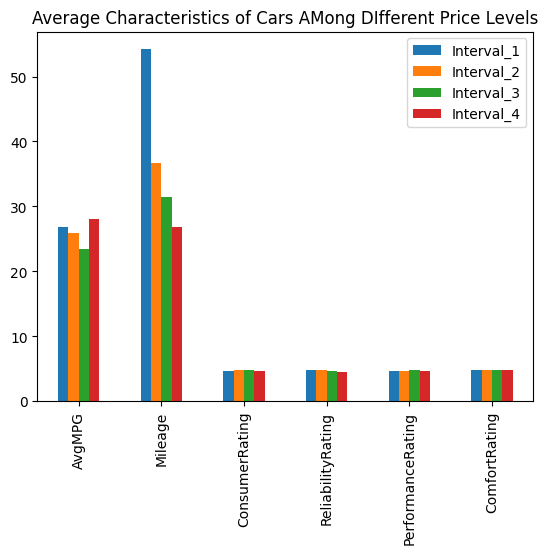

In [ ]:
price_interval_df.plot.bar(title = "Average Characteristics of Cars AMong DIfferent Price Levels")
plt.show()

Mileage is in terms of 1000s of miles.

The grouped barplot visualizes how the average values of the variables differ across the different price intervals. We can see that among all the different price intervals, the different average values for the ratings have very little variation. One of the main differences that we can see among the price intervals is the average miles per gallon, however, there still isnt much variation to be seen. The most noticiable difference among price intervals is mileage (represented in terms of 1000s), where with each interval level increase the mileage decreases. This supports the idea that the more use a car gets (increase in mileage), the lower its value.

## Findings

Going back to the initial question, we can can see that there are notible differences between cars within the different price intervals. The price intervals were based on the summary statistic quartiles (min to Q1, Q1 to Median, Median to Q3, and Q3 to Max). Based on the correlation plot, we can see that all of the ratings are positively correlated with eachother, and from the grouped bar plot we can see that for each rating based variable, there is little to no variation among the different price levels. In addition to this, there is little variation between the AvgMPG across the different price intervals. By taking a random sample of the cars in each cluster we can better understand the characteristics that determine the price differentiation.

For the first price interval we can see that the car has around 54k miles on it. For interval 2, we can see that the car has around 37k miles on it. For interval 3, we can see that the car has around 31k miles on it. For interval 4, we can see that the car has around 27k miles on it. This supports the information from the correlation plot that the price of the car significantly decreases the greater the mileage on the car.

When we take a look at the type of cars at each interval, we also get the following results:

Interval 1 Cars: 2012 Toyota 4Runner SR5, 2019 Buick Encore, 2014 Mercedes Benz E-Class, etc.

Interval 2 Cars: 2018 Ford Explorer XLT, 2019 Hyundai Santa Fe Ultimate, 2019 Honda CR-V, etc

Interval 3 Cars: 2021 Honda Pilot Touring, 2020 Mercedes Benz GLC 300, 2017 Lexus RC 350 Base, etc

Interval 4 Cars: 2018 Ford F-150 Lariat, 2020 Dodge Charger, 2021 Land Rover X, 2019 Lamborghini Urus Base, etc.

Looking at the cars in the different intervals, we can see that whether a car is newer/ older (in terms of year), or even the brand of the car can be found at different price intervals. As such we can see that the mileage of the car stands as the factor that cuts down the price of a car most, and the negative correlation exists beyond the brands of the car.